In [1]:
import networkx as nx
import git
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm, trange

In [ ]:
graph = nx.read_adjlist('git.adjlist', create_using=nx.DiGraph())
repo = git.Repo('/Users/max/repos/configuration')

In [ ]:
for ref in repo.heads:
    print(graph[ref.commit.hexsha[:6]])

In [ ]:
def commit2node(ref, graph):
    return graph[ref.commit.hexsha[:6]]

In [ ]:
tips = sorted(repo.heads, key=lambda x: x.commit.committed_date, reverse=True)

In [ ]:
SPACER = 'spacer-'

import itertools
refs = [ref.commit.hexsha[:6] for ref in tips][:1]
layers = []
seen_refs = set(refs)
while refs:
    #print('refs: ', refs)
    for i, ref in enumerate(refs):
        #print('ref {}, index {}'.format(ref, i))
        
        # dereference if it's a spacer
        if ref.startswith(SPACER):
            #print('dereferencing')
            ref = ref[len(SPACER):]

        # if it's a branch point and we haven't discovered all of its parents yet
        if graph.in_degree(ref) > 1 and any(parent not in seen_refs for parent in graph.predecessors(ref)):
            #print('adding a spacer')
            refs[i] = SPACER + ref  #add a spacer with a reference to the actual node
            
    # At a merge point, multiple parents will add a ref to a layer. This deduplicates them.
    in_layer = set()
    for i, ref in enumerate(refs):
        if ref in in_layer:
            #print('found dup {}, removing'.format(ref))
            del refs[i]
        else:
            in_layer.add(ref)
            
    
    layers.append(refs)
    seen_refs.update(refs)
    
    #all parents of tips starting from the left
    refs = list(itertools.chain(*[
                graph.successors(
                    ref[len(SPACER):] if ref.startswith(SPACER) else ref
                ) for ref in refs]))
    
    

In [ ]:
%matplotlib inline
print('starting')
fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-1,15)
ax.set_ylim(-5,21)

print('Drawing nodes')
for y in range(20):
    layer = layers[y]
    for x, ref in enumerate(layer):
        if x > 15:
            break
        if not ref.startswith(SPACER):
            c = plt.Circle((x,y), radius=.1, color='b')
            ax.add_patch(c)

print('Drawing lines')
for y in range(1,20):
    print(y)
    #import pdb; pdb.set_trace()
    newlayer = layers[y]
    oldlayer = layers[y-1]
    print(oldlayer, newlayer)
    for x2, ref in enumerate(newlayer):
        if x2 > 15:
            break
        print('outer', ref)
        print('parents', graph.predecessors(ref if not ref.startswith(SPACER) else ref[len(SPACER):]))
        for parent in graph.predecessors(ref if not ref.startswith(SPACER) else ref[len(SPACER):]):
            print('inner', parent)
            try:
                x1 = oldlayer.index(parent)
            except ValueError:
                x1 = oldlayer.index(SPACER + parent)
            l = plt.Line2D((x1, x2), (y-1, y))
            ax.add_line(l)

plt.show()

In [ ]:
graph.predecessors('380f4f')

In [ ]:
graph.predecessors('b82a1b')

In [ ]:
'merge' in graph

In [ ]:
graph2 = nx.DiGraph()
foo = graph2.add_node(1)
foo

# Set coordinates directly

In [82]:
%matplotlib inline
graph = nx.read_adjlist('git.adjlist', create_using=nx.DiGraph())
repo = git.Repo('/Users/max/repos/configuration')
#tips = sorted(repo.heads, key=lambda x: x.commit.committed_date, reverse=True)
#tips = [ref.commit.hexsha[:10] for ref in tips][:1]
tips = ['f55fad42a1']

In [98]:
seen_refs = set(tips)
refs = tips

#while refs:
#print ('working', end=' ')
for i in range(300):
    print(refs)
    #if i%5 == 0: print(str(i/5), end=' ')
    new_refs = []
#     if 'adae6c' in refs:
#         import pdb; pdb.set_trace()
    for j, ref in enumerate(refs):
        # if it's a branch point and we haven't discovered all of its parents yet
        if graph.in_degree(ref) > 1 and any(parent not in seen_refs for parent in graph.predecessors(ref)):
            #defer
            new_refs.append(ref)
        else:
            # Assign x,y coords
            # At a merge point, multiple parents will add the same ref to refs multiple times.
            # Since merges always go to the left and we iterate left-to-right,
            # if coords are already set, do nothing.
            if 'x' not in graph.node[ref] and 'y' not in graph.node[ref]:
                graph.node[ref]['x'], graph.node[ref]['y'] = j, i

            #add it to the next round. Use gitpython so parents end up in the right order
            for parent in repo.commit(ref).parents:
                #make sure not to add parents to new_refs if they're already there
                # This could happen at a branch point, since several refs point to the same parent
                if parent.hexsha[:10] not in new_refs:
                    new_refs.append(parent.hexsha[:10])
        #print(ref, graph.node[ref])
    
    seen_refs.update(refs)
    refs = new_refs

['f55fad42a1']
['b25954cb02', '9eabe9efbd']
['32ed11f9be', 'a608449994', '63ec76080f']
['63ec76080f', 'de64531ebd', 'b3a7dc07de', '63ec76080f']
['63ec76080f', 'b3a7dc07de', '63ec76080f']
['5b1dbcacd1', 'dec81bd008', 'b3a7dc07de']
['5b1dbcacd1', 'b3a7dc07de']
['090606a48b', '585441fe0b', 'b3a7dc07de']
['a671590ea7', '41b58ec835', 'b3a7dc07de']
['a671590ea7', 'b3a7dc07de']
['01716f89e0', '53dfdc1295', 'b3a7dc07de']
['1565b21bd6', '13b7e0282a', 'b3a7dc07de']
['1e8b9b3559', '935a529ff8', 'b3a7dc07de']
['1e8b9b3559', 'c36a71cb0c', 'b3a7dc07de']
['4c3456e8a8', '43356ce215', 'dc4365c40d', 'b3a7dc07de']
['4c3456e8a8', 'e73eca3029', '6b22eae89a', 'b3a7dc07de']
['4c3456e8a8', 'e73eca3029', 'b3a7dc07de']
['380f4f2ce6', '7abf09c3c6', 'e73eca3029', 'b3a7dc07de']
['380f4f2ce6', 'e73eca3029', 'b3a7dc07de']
['87a1beaf43', '578f6fef79', 'e73eca3029', 'b3a7dc07de']
['87a1beaf43', 'e73eca3029', 'b3a7dc07de']
['e73eca3029', '3ca2f8ba2d', 'e73eca3029', 'b3a7dc07de']
['e73eca3029', 'e73eca3029', 'b3a7dc07de

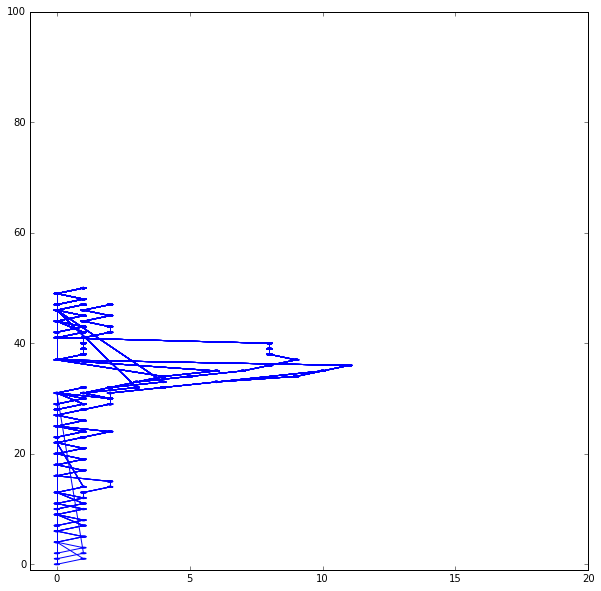

In [99]:
from time import time
timings = []

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-1,20)
ax.set_ylim(-1,100)

def draw():
    refs = tips
    for i in trange(300):
        for j, ref in enumerate(refs):
    #         print(ref, graph.node[ref])
            if all(c in graph.node[ref] for c in ('x', 'y')):
                start = time()
                c = plt.Circle((graph.node[ref]['x'], graph.node[ref]['y']), radius=.1, color='b')
                duration = time() - start
                timings.append({'type': 'makecircle', 'desc': '{},{}'.format(graph.node[ref]['x'], graph.node[ref]['y']), 'time': duration})

                start = time()
                ax.add_patch(c)
                duration = time() - start
                timings.append({'type': 'addcircle', 'desc': '{},{}'.format(graph.node[ref]['x'], graph.node[ref]['y']), 'time': duration})

                for child in graph.successors(ref):
                    if all(c in graph.node[child] for c in ('x', 'y')):
                        #print(ref, graph.node[ref], child, graph.node[child])
                        start = time()
                        l = plt.Line2D((graph.node[ref]['x'], graph.node[child]['x']),(graph.node[ref]['y'], graph.node[child]['y']))
                        duration = time() - start
                        timings.append({'type': 'makeline', 'desc': '{},{} -> {},{}'.format(
                            graph.node[ref]['x'], graph.node[ref]['y'],
                            graph.node[child]['x'], graph.node[child]['y']
                        ), 'time': duration})
                        
                        start = time()
                        ax.add_line(l)
                        duration = time() - start
                        timings.append({'type': 'addline', 'desc': '{},{} -> {},{}'.format(
                            graph.node[ref]['x'], graph.node[ref]['y'],
                            graph.node[child]['x'], graph.node[child]['y']
                        ), 'time': duration})
        start = time()
        # Dedup again, for same reasons as above
        #TODO: make sure we don't re-traverse nodes by arriving to them by different paths
        #keep a set of "seen" nodes and don't add things to the next round if they're in it
        refs = set(p.hexsha[:10] for r in refs for p in repo.commit(r).parents)
        duration = time() - start
        timings.append({'type': 'parents', 'desc': refs, 'time': duration})
draw()

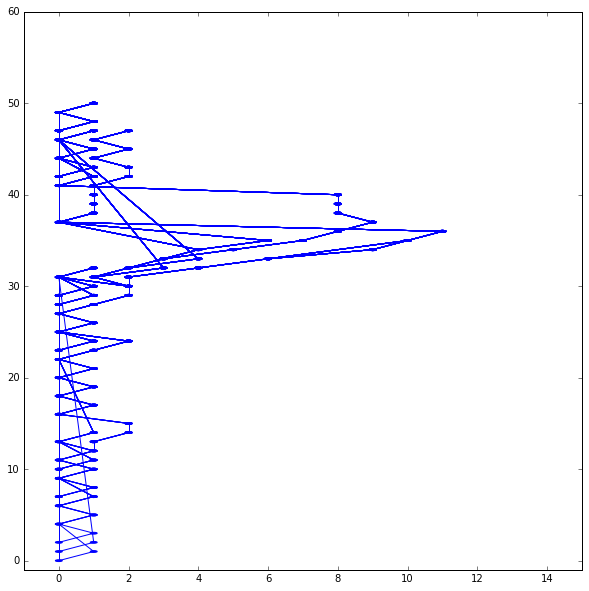

In [100]:
%matplotlib inline
ax.set_xlim(-1,15)
ax.set_ylim(-1,60)
fig

In [14]:
[(p, graph.node[p]) for p in ['168ecc', '46b2ae', 'adae6c', 'bad209', '441584', '8a20c3']]

[('168ecc', {'x': 0, 'y': 17}),
 ('46b2ae', {'x': 1, 'y': 17}),
 ('adae6c', {}),
 ('bad209', {'x': 0, 'y': 18}),
 ('441584', {'x': 1, 'y': 18}),
 ('8a20c3', {'x': 2, 'y': 18})]

In [9]:
repo.commit(tips[0]).parents

(<git.Commit "380f4f2ce67bb573cad5cfbd4458a591e5b23833">,
 <git.Commit "7abf09c3c6b664290c7a2081cf519e81d534d37e">)

In [13]:
[p.hexsha[:10] for r in refs for p in repo.commit(r).parents]

['380f4f', '7abf09']

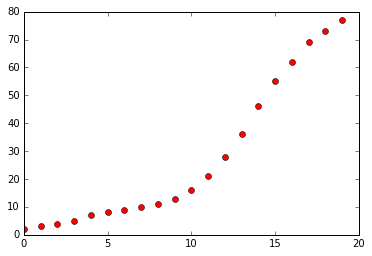

In [70]:
trash = plt.plot(*zip(*enumerate(len(t['desc']) for t in timings if t['type'] == 'parents')), 'ro')

In [73]:
refs = sorted((t['desc'] for t in timings if t['type'] == 'parents'), key=len)[-1]
assert len(refs) == len(set(refs))
for ref in refs:
    print(ref, [p.hexsha[:10] for p in repo.commit(ref).parents])

d3880f ['9e41b5', 'f67dd4']
98184d ['ff9338', '823fed']
9e41b5 ['a514fb', '27a933']
adae6c ['43e2f6', '5a80d2']
43e2f6 ['312ff0', '48fd55']
a514fb ['ad9f8c', 'd7d783']
4d6e5f ['a0cd13']
452308 ['8f03d8', '535b80']
57063b ['243ad1']
d938e9 ['4117ae', '20af2b']
ff9338 ['2bda84', '61bb7f']
27478c ['adae6c']
b45e52 ['a0cd13', '4d6e5f']
de2d23 ['d21368']
8bc98d ['c4f7a2']
186bf9 ['947eed', 'a2ab9b']
b68dfc ['70561b']
3fbdd6 ['6d715a']
41f4aa ['19e012']
ecb949 ['f743f1', '2c3f04']
a0cd13 ['d21368', 'de2d23']
1627d0 ['7345f9']
31df86 ['9fe08b']
ad9f8c ['3c5413', 'e322bb']
7ed74e ['878d68']
72a5d9 ['6e59c5']
a2ab9b ['947eed']
d002a9 ['985215']
c89ae4 ['200fe0']
823fed ['ff9338']
136e3a ['d3880f', 'ec0583']
028332 ['8db4c3']
d21368 ['0122c6', '6dcde7']
48f79b ['779b15']
27a933 ['a514fb']
20af2b ['ecb949']
f67dd4 ['9e41b5']
f4b47d ['8f03d8']
30bac9 ['d3bb7c', '062f52']
432fd7 ['98184d', '27478c']
19e012 ['70e779']
6d715a ['40f470']
8f03d8 ['136e3a', 'c89ae4']
6dcde7 ['0122c6']
4117ae ['ecb949', 